## 0. Khai Báo thư viện

In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr


- Tạo 1 hàm để in chữ và thêm background cho nó. 

In [3]:
def draw_text(img, text,
          font=cv2.FONT_HERSHEY_PLAIN,
          pos=(0, 0),
          font_scale=3,
          font_thickness=2,
          text_color=(0, 255, 0),
          text_color_bg=(0, 0, 0)
          ):

    x, y = pos
    text_size, _ = cv2.getTextSize(text, font, font_scale, font_thickness)
    text_w, text_h = text_size
    cv2.rectangle(img, (pos[0], pos[1] -5), (x + text_w +5, y + text_h + 5), text_color_bg, -1)
    cv2.putText(img, text, (x, y + text_h + font_scale - 1), font, font_scale, text_color, font_thickness)

    return text_size

## 1. Đọc ảnh và đưa về dạng trắng đen

- Đọc ảnh.

In [4]:
img = cv2.imread('images/image1.jpg')

- Chuyển đổi ảnh màu sang ảnh xám.

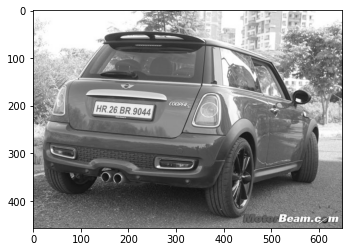

In [5]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

## 2. Áp dụng filter để lọc nhiễu. 

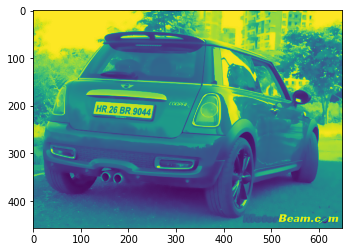

In [6]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) 
plt.imshow(bfilter)

## 3. Tìm cạnh để xác định vị trí của biển số.

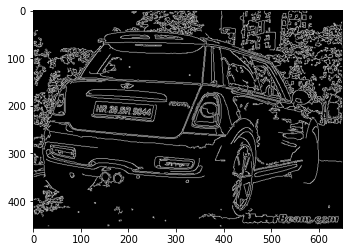

In [7]:
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

## 4. Tìm countours và áp filter

- Xác định các contours trên ảnh.

In [8]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

- Lọc ra các contour phủ hợp.

In [9]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

- Hiển thị kết quả

In [10]:
location

array([[[122, 219]],

       [[246, 227]],

       [[252, 200]],

       [[132, 191]]], dtype=int32)

- Tạo mask và hiển thị kết quả.

In [11]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

gray.shape

(457, 650)

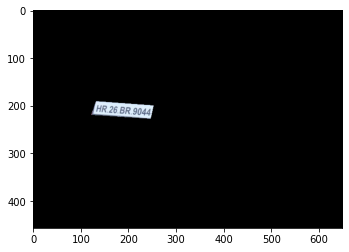

In [12]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [13]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

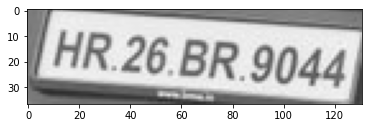

In [14]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

## 5. Dùng thư viện EasyOCR để đọc kí tự trên biển số.

In [15]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[6, 4], [128, 4], [128, 34], [6, 34]], 'HR.26 BR.9044', 0.5728024956877317)]

## 6. Hiển thị kết quả lên ảnh gốc. 

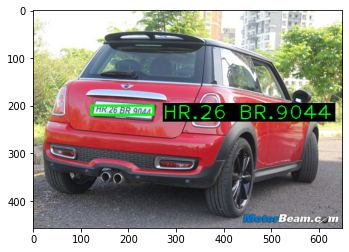

In [16]:
font = cv2.FONT_HERSHEY_SIMPLEX

text1 = result[0][-2]
res = draw_text(img, text=text1, pos = (approx[2][0][0] + 20 , approx[2][0][1] ), text_color=(0,255,0), font_thickness=2, text_color_bg=(0,0,0))


if len(result) == 2 :
    text2 = result[1][-2][0: 6]
    res = draw_test(img, text=text2, pos = (approx[2][0][0] + 20 , approx[2][0][1] + 50 ), text_color=(0,255,0), font_thickness = 2, text_color_bg = (0,0,0))




res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))